In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import geopy
from geopy import distance

In [3]:
#https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019
estate = pd.read_csv("sao-paulo-properties-april-2019.csv", index_col=0)
#https://www.kaggle.com/thiagodsd/sao-paulo-metro
metro = pd.read_csv("metrosp_stations.csv", index_col="station")

In [4]:
mask = (estate.Longitude < -46) & (estate.Longitude > -46.9) & (estate.Latitude < -23) & (estate.Latitude > -24)
estate = estate[mask]

In [5]:
estate.columns = estate.columns.str.lower().str.replace(" ","_")

In [6]:
estate["property_coords"] = list(zip(estate.longitude, estate.latitude))
metro["station_coords"] = list(zip(metro.lon, metro.lat))

In [7]:
estate.head()

,condo,size,rooms,toilets,suites,parking,elevator,furnished,swimming_pool,new,district,negotiation_type,property_type,latitude,longitude,property_coords
Price,,,,,,,,,,,,,,,,
930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486,"(-46.479486, -23.543138)"
1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718,"(-46.480717999999996, -23.550239)"
1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665,"(-46.485665000000004, -23.542818)"
1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014,"(-46.483014000000004, -23.547171)"
1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436,"(-46.482436, -23.525025)"


In [8]:
def get_list_of_nearest_stations(properties):
    nearest_station = []
    names = []
    distances = []
    for station, name in zip(metro.station_coords, metro.index):
        names.append(name)
        distances.append(geopy.distance.distance(properties, station).km)
        min_value_index = distances.index(min(distances))
    nearest_station.append(names[min_value_index])
    return pd.Series(nearest_station)


estate['nearest_metro_station'] = estate['property_coords'].apply(get_list_of_nearest_stations)
%timeit

In [9]:
def get_list_of_nearest_stations_distance(properties):
    nearest_station_distance = []
    names = []
    distances = []
    for station, name in zip(metro.station_coords, metro.index):
        names.append(name)
        distances.append(geopy.distance.distance(properties, station).km)
        min_value = min(distances)
    nearest_station_distance.append(min_value)
    return pd.Series(nearest_station_distance)


estate['nearest_metro_station_distance'] = estate.property_coords.apply(get_list_of_nearest_stations_distance)
%timeit

In [10]:
estate.to_csv('estate_updated.csv')

In [11]:
estate = pd.read_csv('estate_updated.csv')
estate.columns = estate.columns.str.lower().str.replace(" ","_")

In [12]:
estate_sale = estate[estate.negotiation_type == "sale"]
estate_rent = estate[estate.negotiation_type == "rent"]

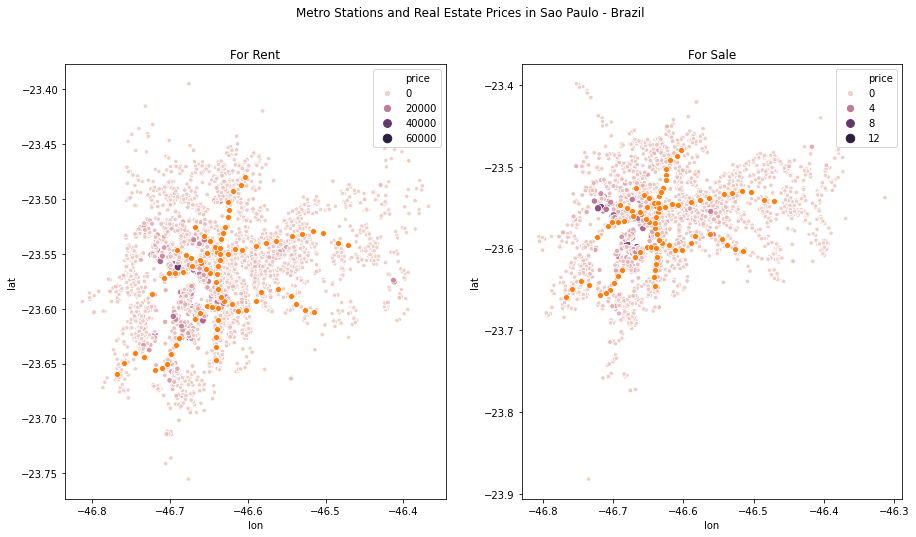

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle('Metro Stations and Real Estate Prices in Sao Paulo - Brazil')
sns.scatterplot(data=estate_rent, x="longitude", y="latitude", hue="price", size="price", ax=ax1).set_title('For Rent')
sns.scatterplot(data=metro, x="lon", y="lat", ax=ax1)
sns.scatterplot(data=estate_sale, x="longitude", y="latitude", hue="price", size="price", ax=ax2).set_title('For Sale')
sns.scatterplot(data=metro, x="lon", y="lat", ax=ax2)

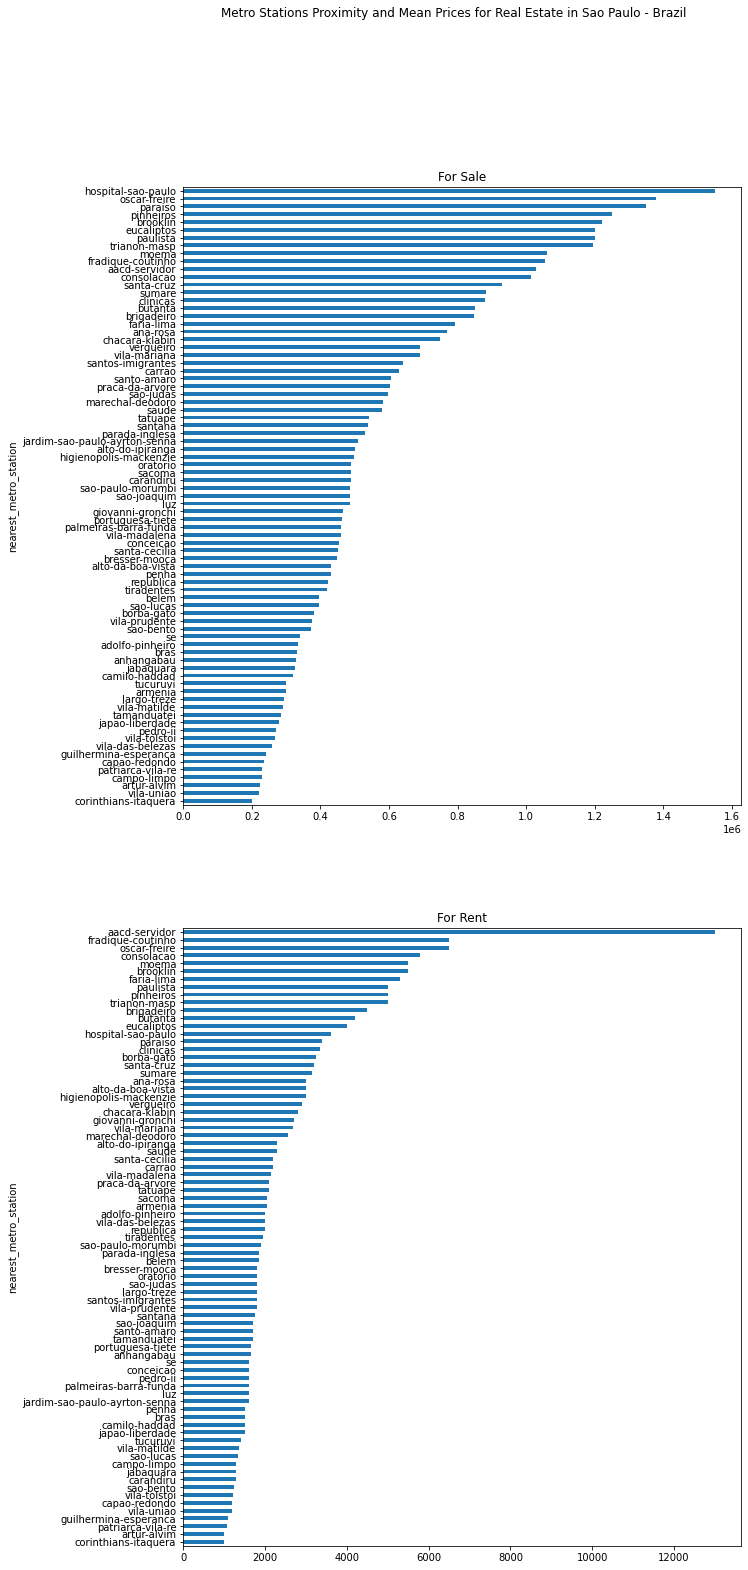

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,25))
fig.suptitle('Metro Stations Proximity and Mean Prices for Real Estate in Sao Paulo - Brazil')
estate_sale.groupby('nearest_metro_station')['price'].median().sort_values().plot(kind='barh', title="For Sale", ax=ax1)
estate_rent.groupby('nearest_metro_station')['price'].median().sort_values().plot(kind='barh', title="For Rent", ax=ax2)

In [15]:
estate_close_to_metro_sale = estate[(estate.nearest_metro_station_distance < 1) & (estate.negotiation_type == "sale")]
estate_close_to_metro_rent = estate[(estate.nearest_metro_station_distance < 1) & (estate.negotiation_type == "rent")]

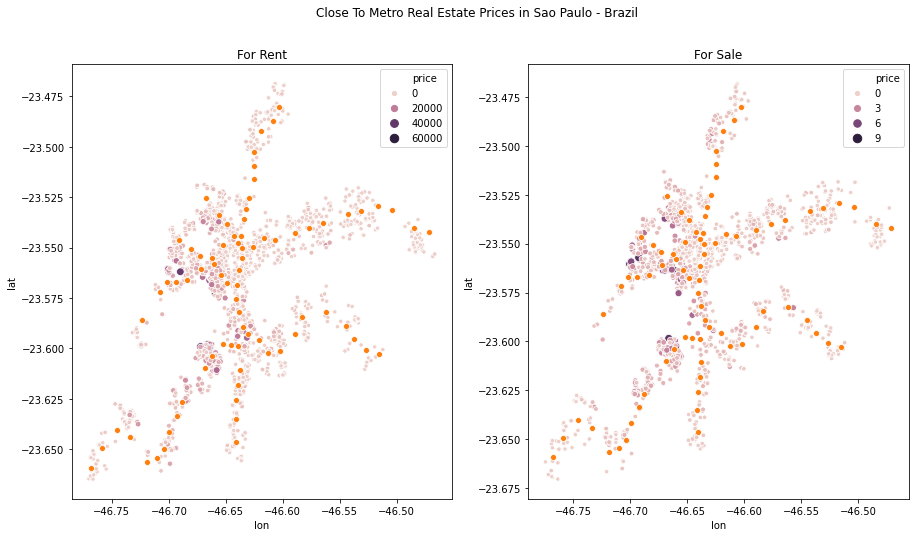

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle('Close To Metro Real Estate Prices in Sao Paulo - Brazil')
sns.scatterplot(data=estate_close_to_metro_rent, x="longitude", y="latitude", hue="price", size="price", ax=ax1).set_title('For Rent')
sns.scatterplot(data=metro, x="lon", y="lat", ax=ax1)
sns.scatterplot(data=estate_close_to_metro_sale, x="longitude", y="latitude", hue="price", size="price", ax=ax2).set_title('For Sale')
sns.scatterplot(data=metro, x="lon", y="lat", ax=ax2)

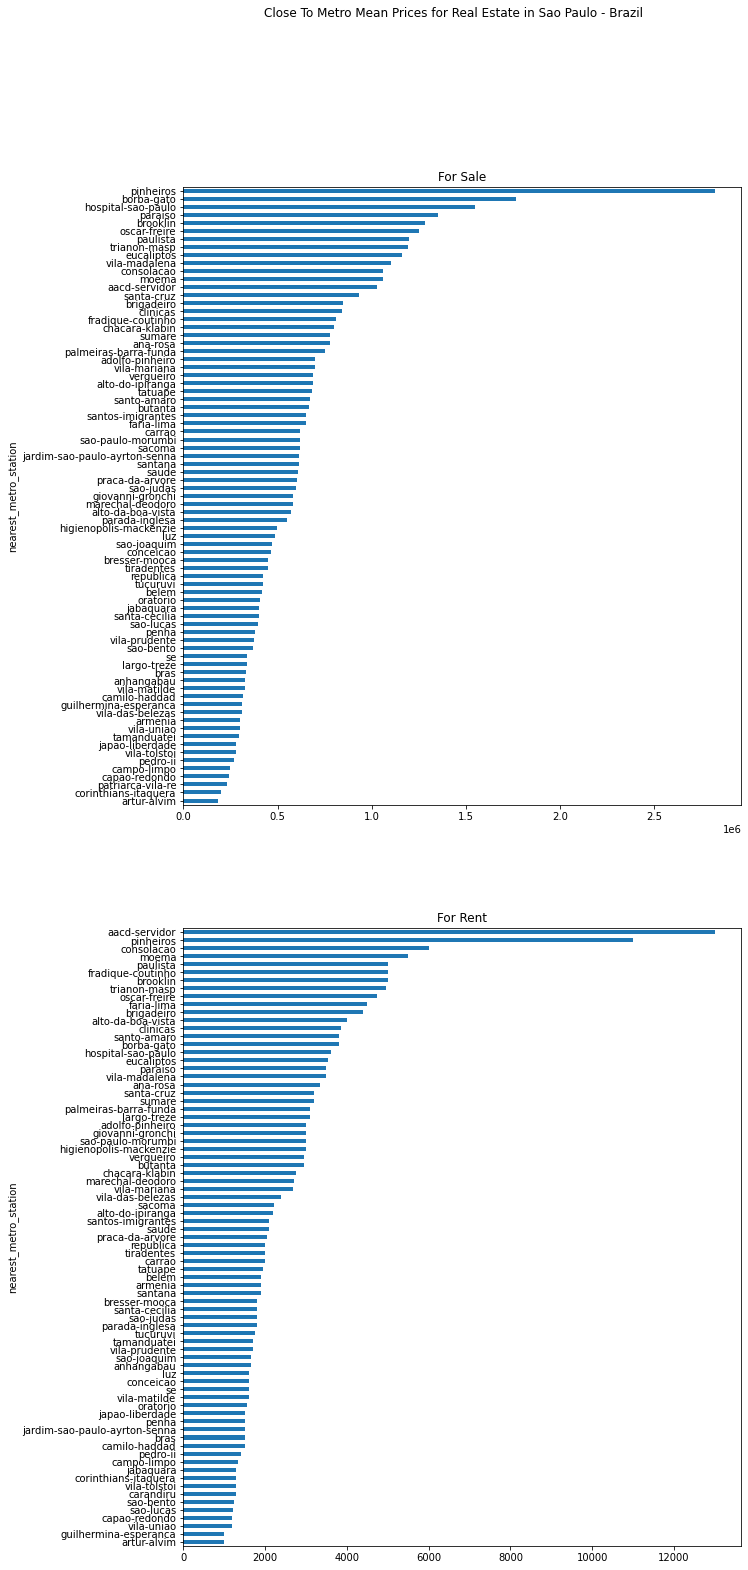

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,25))
fig.suptitle('Close To Metro Mean Prices for Real Estate in Sao Paulo - Brazil')
estate_close_to_metro_sale.groupby('nearest_metro_station')['price'].median().sort_values().plot(kind='barh', title="For Sale", ax=ax1)
estate_close_to_metro_rent.groupby('nearest_metro_station')['price'].median().sort_values().plot(kind='barh', title="For Rent", ax=ax2)

In [18]:
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
pandas_profiling.ProfileReport(estate)

In [ ]:
from pivottablejs import pivot_ui

In [ ]:
pivot_ui(estate)

In [ ]:
estate_sale.head()

In [ ]:
estate_rent.head()

In [ ]:
from pydqc.data_compare import distribution_compare_pretty
distribution_compare_pretty(estate_rent, estate_sale, 'price')